In [1]:
# default_exp core

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
from nbdev.showdoc import *

# Core functions

In [4]:
#export
def stats(x):
    "Returns `mean` and `std` of a tensor"
    return x.mean(),x.std()

In [5]:
t = torch.randn((50,50))
t[:5,:5]

tensor([[-0.7444, -0.5304, -0.1145,  0.6246,  0.0372],
        [ 0.2247,  0.9756, -1.1599,  0.1922, -1.0071],
        [ 0.6112,  0.3034, -0.8551, -1.3674,  0.0815],
        [-0.6475,  0.8792,  0.5653,  0.3802,  1.1776],
        [-0.7622,  0.7702,  0.7275, -0.2205, -1.8443]])

In [6]:
stats(t)

(tensor(0.0130), tensor(0.9993))

### Cross Entropy Loss

Softmax of our activations is defined by:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{e^{x_{0}} + e^{x_{1}} + \cdots + e^{x_{n-1}}}$$

or more concisely:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{\sum_{0 \leq j \leq n-1} e^{x_{j}}}$$ 

where $n$ is the number of classes.

In practice, we will need the log of the softmax when we calculate the loss.

In [7]:
#export
def log_softmax(x):
    
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [8]:
log_softmax(t)

tensor([[-4.8892, -4.6751, -4.2592,  ..., -3.9869, -5.9575, -3.4586],
        [-4.3245, -3.5736, -5.7091,  ..., -2.4028, -3.9787, -3.5831],
        [-3.8113, -4.1191, -5.2776,  ..., -5.1819, -2.1017, -4.2893],
        ...,
        [-4.3438, -5.1789, -4.9209,  ..., -4.7017, -4.2018, -1.7397],
        [-4.6690, -3.0647, -4.6966,  ..., -5.9671, -6.9491, -4.8425],
        [-5.1538, -3.8755, -4.9438,  ..., -3.8971, -4.4482, -5.5689]])

In [9]:
def accuracy(pred,y):
    ""
    return (pred.argmax(dim=1) == y).float().mean()

In [10]:
def error(pred,y):
    return 1-accuracy(pred,y)

In [11]:
#export
def plotdist(x):
    "Plot distribution `x`"
    fig = plt.figure(figsize=(4,3))
    m,s = x.mean(), x.std()
    n,_,_ = plt.hist(x.reshape(-1),bins=100);
    l = [i*s for i in (-3,-2,-1,1,2,3)] # three sigmas
    l.append(m) # plus mean
    plt.vlines(l, 0, n.max(), color='white', alpha=0.2)
    ax = plt.title(f'Mean = {round(float(m),3)}; $\sigma$ = {round(float(s),3)}');

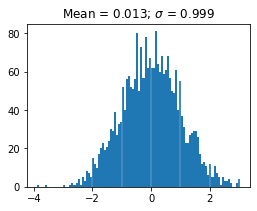

In [12]:
plotdist(t)

In [13]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_mnist.ipynb.
Converted 99_index.ipynb.
